In [1]:
# Cell 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from faker import Faker

fake = Faker()

# Set seed for reproducibility
np.random.seed(42)

In [2]:
# Cell 3: Define dataset size

n_customers = 2000

brands = ["Lunya", "Delifonseca"]

years = np.arange(2020, 2026)

In [3]:
# Cell 4: Create demographics dataset

customer_ids = np.arange(1, n_customers + 1)

ages = np.random.randint(18, 70, n_customers)

genders = np.random.choice(
    ["Female", "Male", "Non-binary"],
    n_customers,
    p=[0.55, 0.40, 0.05]
)

income = np.random.randint(20000, 150000, n_customers)

countries = np.random.choice(
    ["UK", "USA", "Italy", "France", "Germany", "Spain"],
    n_customers
)

preferred_brand = np.random.choice(brands, n_customers)

demographics = pd.DataFrame({
    "customer_id": customer_ids,
    "age": ages,
    "gender": genders,
    "income": income,
    "country": countries,
    "preferred_brand": preferred_brand
})

demographics.head()

,customer_id,age,gender,income,country,preferred_brand
0,1,56,Male,120252,Spain,Lunya
1,2,69,Female,111057,France,Delifonseca
2,3,46,Male,50049,UK,Delifonseca
3,4,32,Non-binary,25618,Italy,Delifonseca
4,5,60,Female,122540,Spain,Delifonseca


In [4]:
# Cell 5: Create sales dataset

n_transactions = 5000

transaction_ids = np.arange(1, n_transactions + 1)

customer_sample = np.random.choice(customer_ids, n_transactions)

brand_sample = np.random.choice(brands, n_transactions)

year_sample = np.random.choice(years, n_transactions)

units = np.random.randint(1, 5, n_transactions)

# Price assumptions
price = np.where(
    brand_sample == "Lunya",
    np.random.uniform(150, 300, n_transactions),
    np.random.uniform(50, 120, n_transactions)
)

revenue = units * price

cost = revenue * np.random.uniform(0.40, 0.70, n_transactions)

sales = pd.DataFrame({
    "transaction_id": transaction_ids,
    "customer_id": customer_sample,
    "brand": brand_sample,
    "year": year_sample,
    "units_sold": units,
    "revenue": revenue,
    "cost": cost
})

sales.head()

,transaction_id,customer_id,brand,year,units_sold,revenue,cost
0,1,589,Delifonseca,2020,1,81.383544,41.773789
1,2,411,Delifonseca,2020,3,226.616623,114.621202
2,3,377,Delifonseca,2025,3,356.410099,178.790676
3,4,1408,Delifonseca,2022,4,433.783425,293.640291
4,5,1870,Delifonseca,2025,3,250.734218,103.961285


In [5]:
# Cell 6: Calculate profit and margin

sales["profit"] = sales["revenue"] - sales["cost"]

sales["profit_margin"] = sales["profit"] / sales["revenue"]

sales.head()

,transaction_id,customer_id,brand,year,units_sold,revenue,cost,profit,profit_margin
0,1,589,Delifonseca,2020,1,81.383544,41.773789,39.609755,0.486705
1,2,411,Delifonseca,2020,3,226.616623,114.621202,111.995421,0.494207
2,3,377,Delifonseca,2025,3,356.410099,178.790676,177.619423,0.498357
3,4,1408,Delifonseca,2022,4,433.783425,293.640291,140.143134,0.323072
4,5,1870,Delifonseca,2025,3,250.734218,103.961285,146.772934,0.585373


In [6]:
# Cell 7: Merge datasets

full_data = pd.merge(
    sales,
    demographics,
    on="customer_id",
    how="left"
)

full_data.head()

,transaction_id,customer_id,brand,year,units_sold,revenue,cost,profit,profit_margin,age,gender,income,country,preferred_brand
0,1,589,Delifonseca,2020,1,81.383544,41.773789,39.609755,0.486705,27,Female,32453,Spain,Lunya
1,2,411,Delifonseca,2020,3,226.616623,114.621202,111.995421,0.494207,44,Female,83185,Italy,Delifonseca
2,3,377,Delifonseca,2025,3,356.410099,178.790676,177.619423,0.498357,47,Male,123699,Italy,Delifonseca
3,4,1408,Delifonseca,2022,4,433.783425,293.640291,140.143134,0.323072,25,Female,59169,Germany,Lunya
4,5,1870,Delifonseca,2025,3,250.734218,103.961285,146.772934,0.585373,56,Male,147251,Italy,Delifonseca


In [7]:
# Cell 8: Total revenue by brand

brand_revenue = full_data.groupby("brand")["revenue"].sum()

print(brand_revenue)

brand
Delifonseca    5.473847e+05
Lunya          1.391071e+06
Name: revenue, dtype: float64


In [8]:
# Cell 9: Average profit margin by brand

margin = full_data.groupby("brand")["profit_margin"].mean()

print(margin)

brand
Delifonseca    0.452374
Lunya          0.451516
Name: profit_margin, dtype: float64


In [9]:
# Cell 10: Average income by brand preference

income_analysis = demographics.groupby(
    "preferred_brand"
)["income"].mean()

print(income_analysis)

preferred_brand
Delifonseca    85965.658706
Lunya          83525.123618
Name: income, dtype: float64


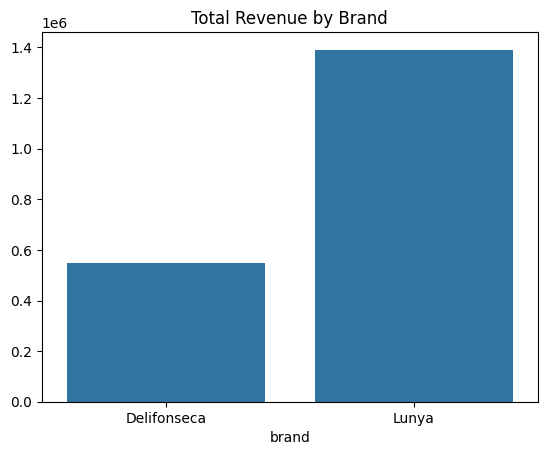

In [10]:
# Cell 11: Plot revenue by brand

sns.barplot(
    x=brand_revenue.index,
    y=brand_revenue.values
)

plt.title("Total Revenue by Brand")
plt.show()

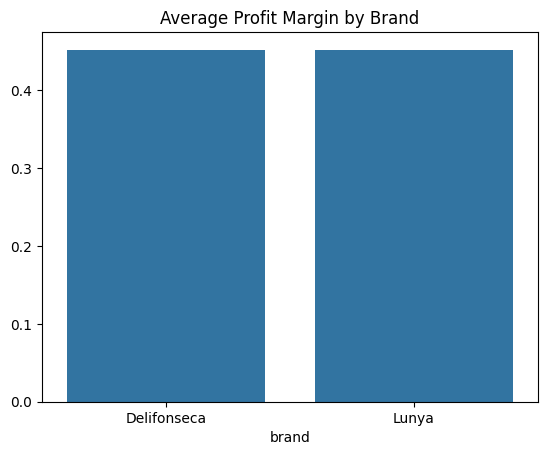

In [11]:
# Cell 12: Profit margin plot

sns.barplot(
    x=margin.index,
    y=margin.values
)

plt.title("Average Profit Margin by Brand")
plt.show()

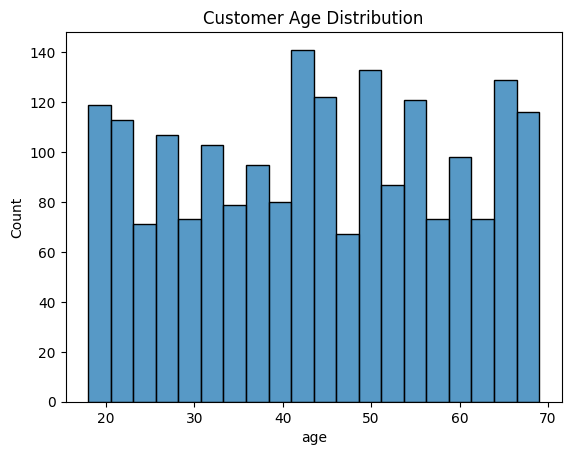

In [12]:
# Cell 13: Age distribution

sns.histplot(
    demographics["age"],
    bins=20
)

plt.title("Customer Age Distribution")
plt.show()

In [13]:
# Cell 14: Save datasets

demographics.to_csv("demographics.csv", index=False)

sales.to_csv("sales.csv", index=False)

full_data.to_csv("full_dataset.csv", index=False)

print("Datasets saved successfully")

Datasets saved successfully
